# 데이터셋 확인하기

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))


전체 샘플의 수 : 1797


In [ ]:
print(digits.target[0])

# 첫번째 샘플의 레이블른 0이다

0


In [ ]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

# 5개 샘플 레이블확인하기

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


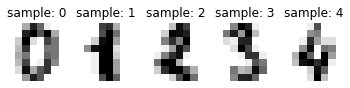

In [ ]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 상위 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)


    # 상위 5개의 샘플을 시각화해봤는데, 순서대로 숫자 0, 1, 2, 3, 4의 손글씨인 것처럼 보인다

훈련 데이터와 레이블을 각각 X, Y에 저장해본다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있다(기존에 활용하던 mnist예제랑 다름)
더 나은 방법은 digts.data를 사용. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태이기 때문. digits.data를 이용해서 첫번째 샘플을 출력해보자


In [ ]:
print(digits.data[0])

# 8 × 8 행렬이 아니라 64차원의 벡터로 저장되있다. 이를 X로 저장하고, 레이블을 Y에 저장

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블(답)

# 파이토치로 다층 퍼셉트론 분류기 만들기

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [ ]:
X = torch.tensor(X, dtype=torch.float32) # 실수텐서
Y = torch.tensor(Y, dtype=torch.int64) # 8바이트 정수텐서

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
loss_fn = nn.CrossEntropyLoss() # 여기서 손실 함수는 소프트맥스 함수를 포함하고 있음.


In [ ]:
optimizer = optim.Adam(model.parameters())


In [ ]:
losses = []

In [ ]:
for epoch in range(100):
  optimizer.zero_grad() # 누적안되게 초기화 하는거
  y_pred = model(X) # forward 연산, 모델을 지정하고 나서 x값을 넣어서 출력값이 예측값인 y프레드 값이 나온다고 가정하면
  loss = loss_fn(y_pred, Y) # 이 값의 차이가 오차다,
  loss.backward() # 하나씩 증분해서 편미분하는거
  optimizer.step()

  if epoch % 10 == 0: # 에포크 10번마다 찍어라
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

Epoch    0/100 Cost: 0.216443
Epoch   10/100 Cost: 0.182552
Epoch   20/100 Cost: 0.158014
Epoch   30/100 Cost: 0.139397
Epoch   40/100 Cost: 0.124669
Epoch   50/100 Cost: 0.112660
Epoch   60/100 Cost: 0.102582
Epoch   70/100 Cost: 0.093968
Epoch   80/100 Cost: 0.086415
Epoch   90/100 Cost: 0.079716


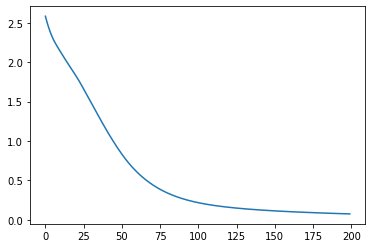

In [ ]:
plt.plot(losses)

In [ ]:
# 예측한 값을 학습만하고 평가는 없는 코드